
Bright Image - Manual Histogram Equalization:


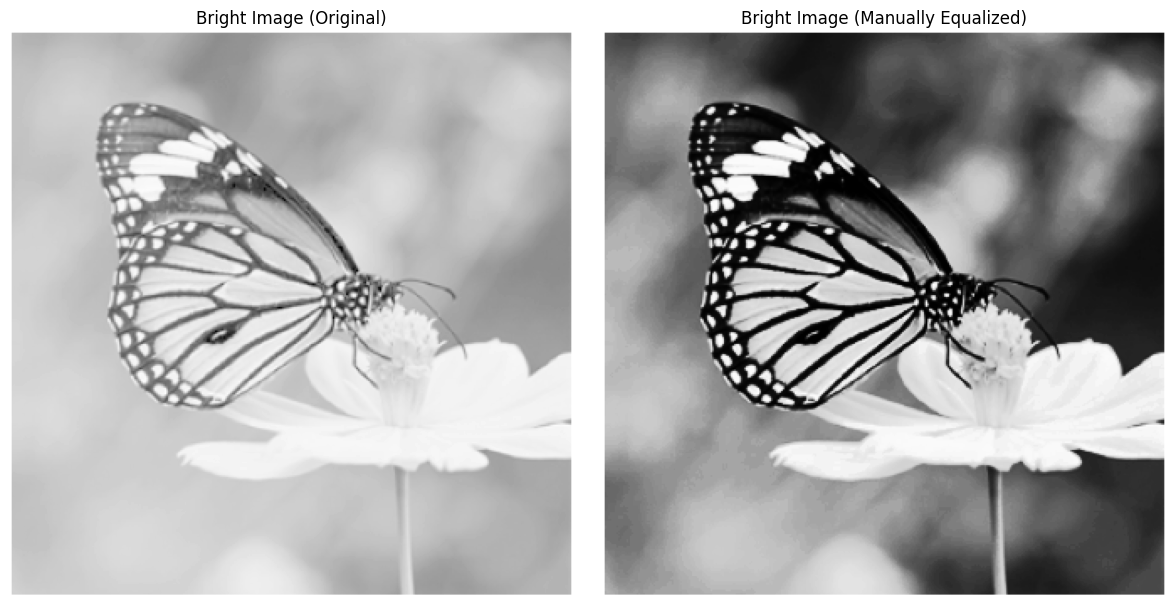

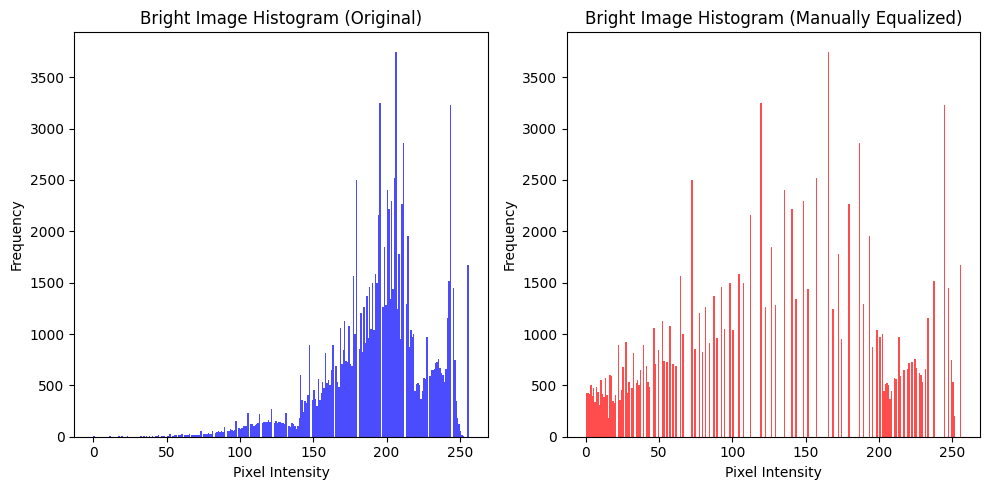


Bright Image - OpenCV Histogram Equalization:


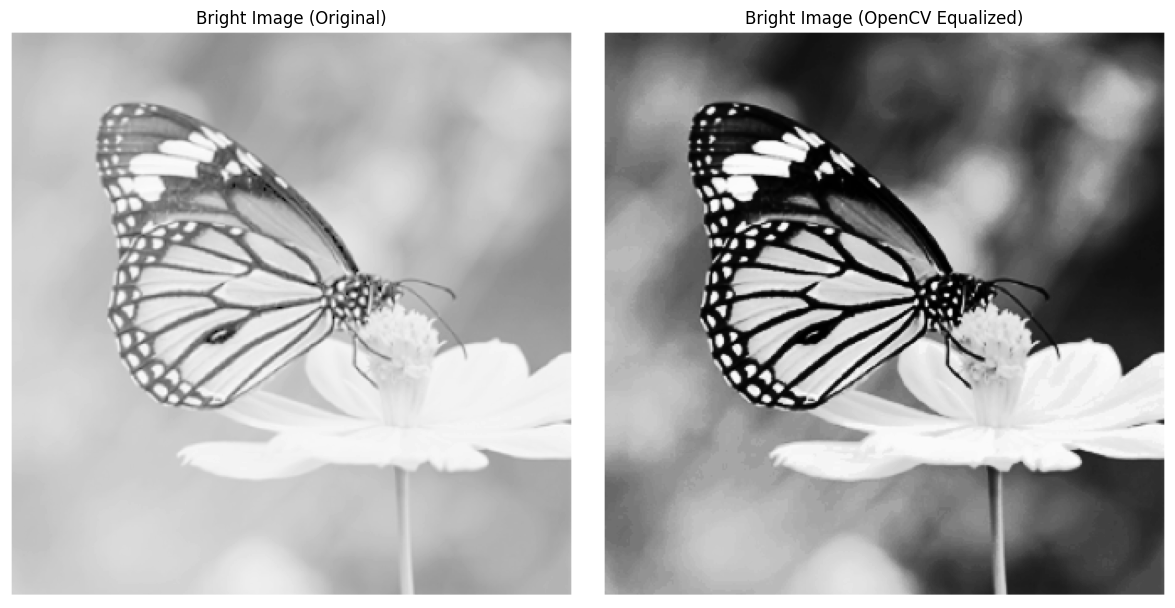

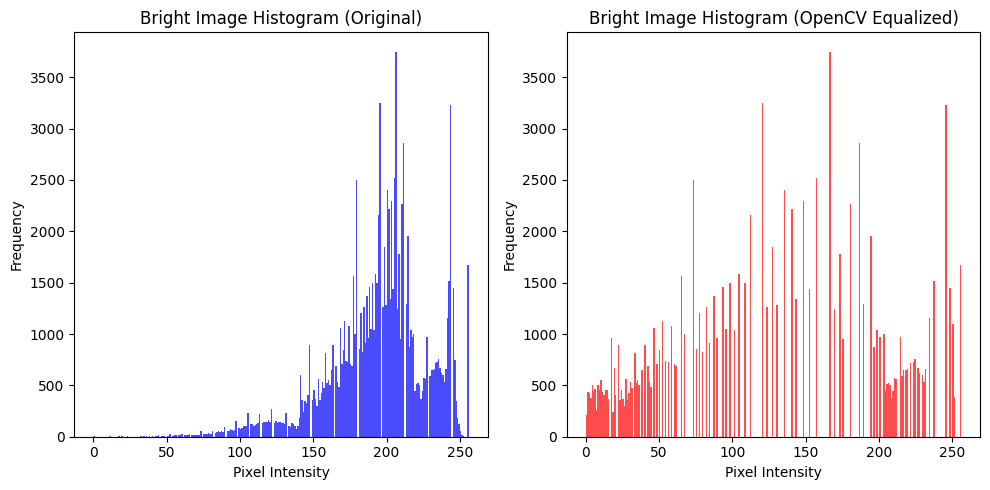


Dark Image - Manual Histogram Equalization:


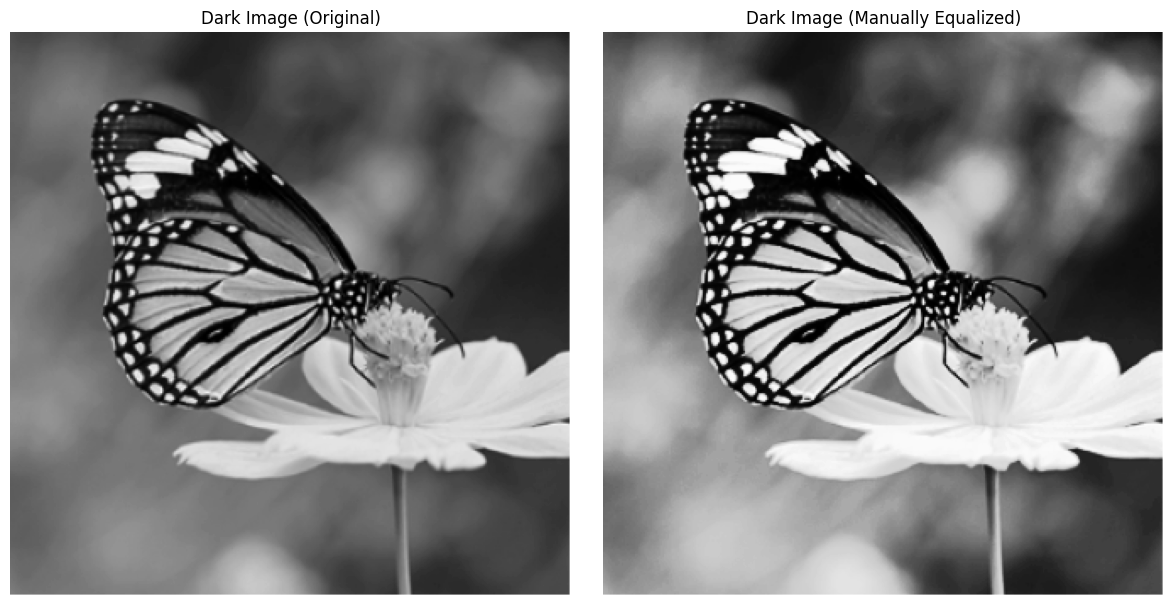

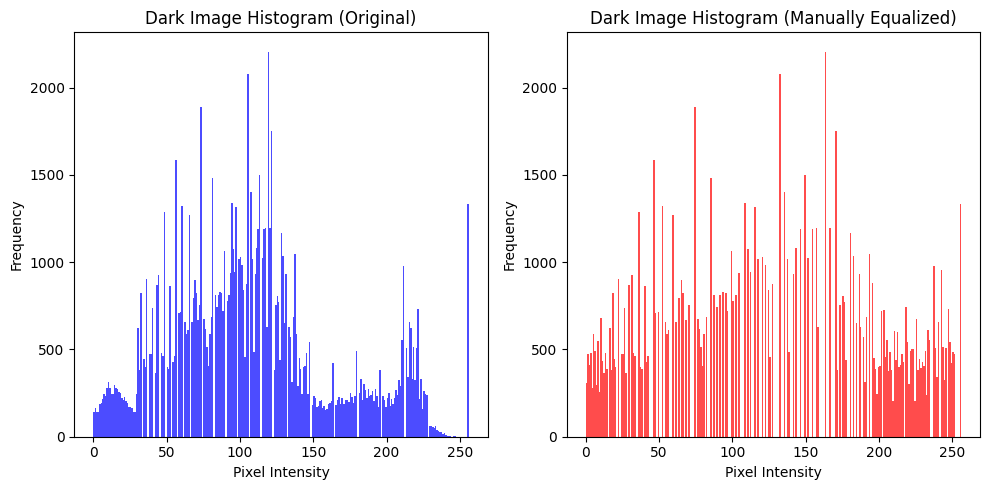


Dark Image - OpenCV Histogram Equalization:


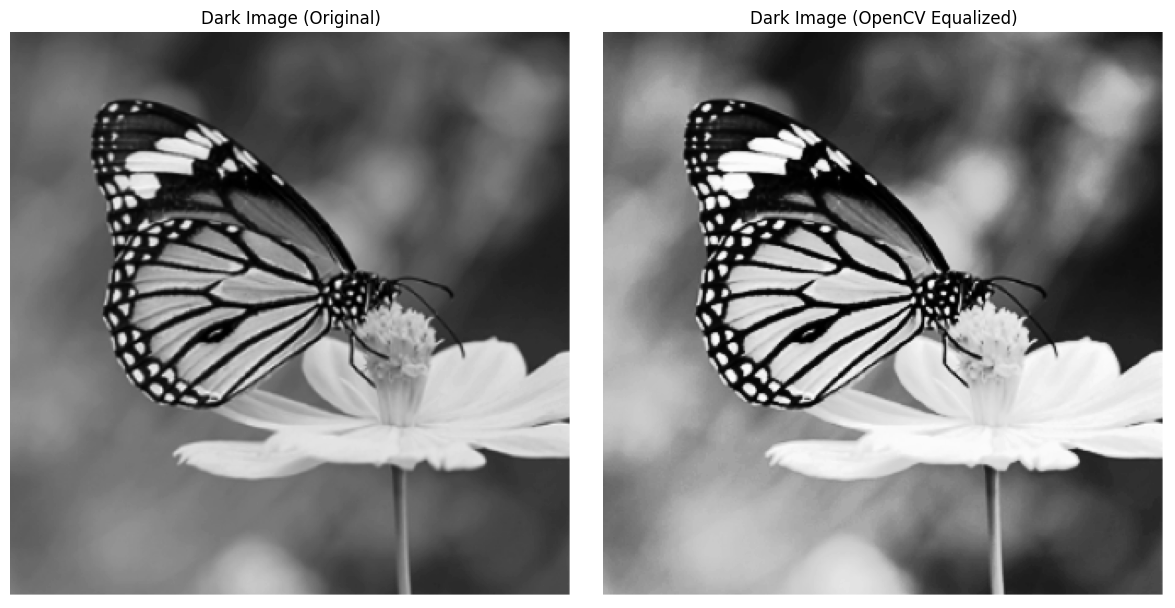

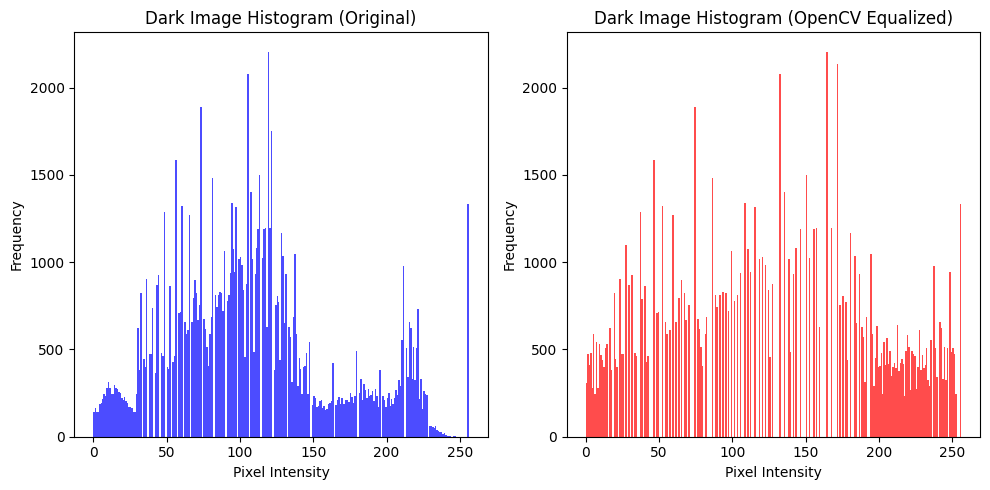


Contrast Narrowed Image - Manual Histogram Equalization:


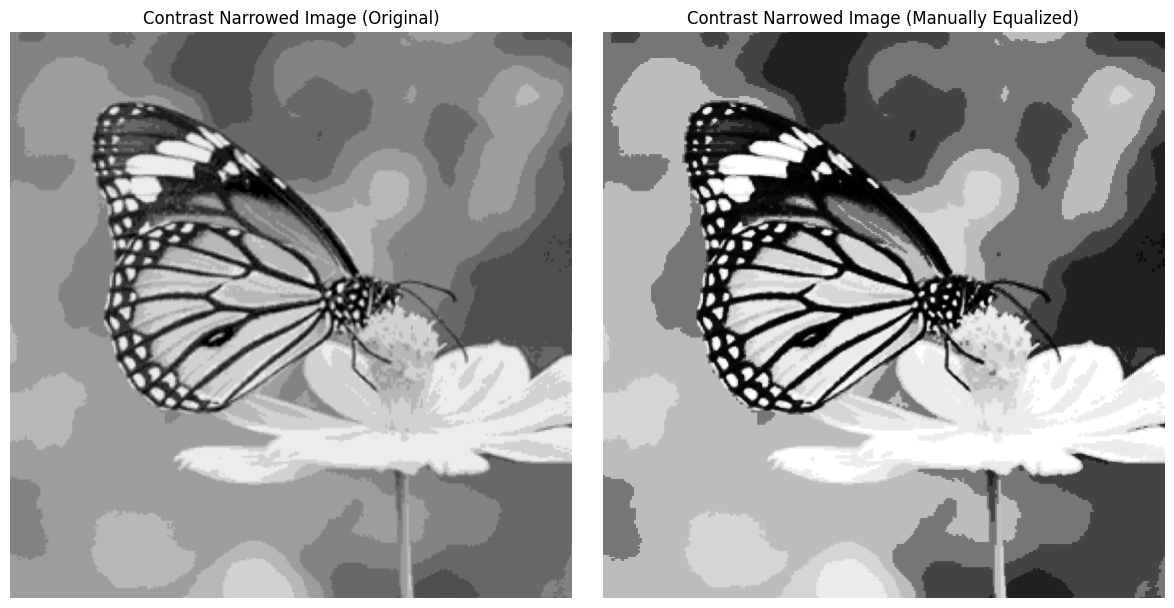

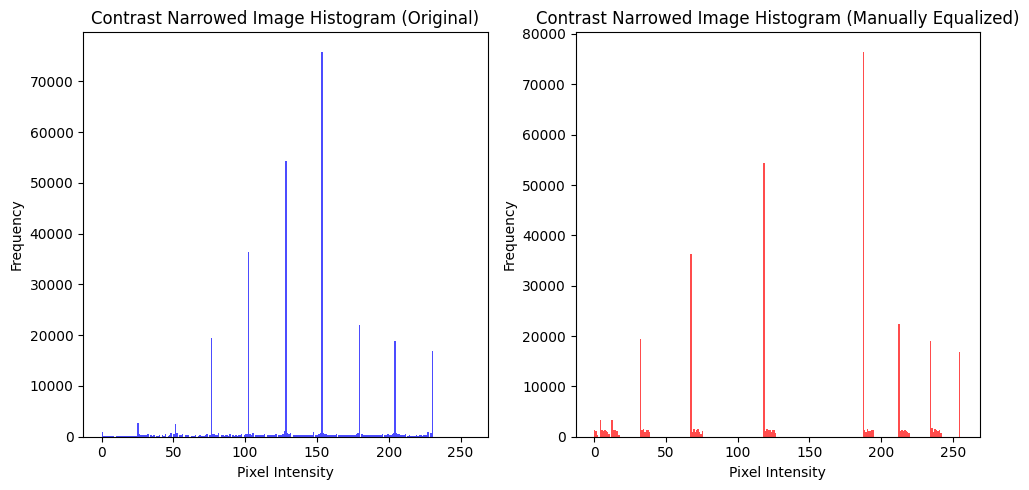


Contrast Narrowed Image - OpenCV Histogram Equalization:


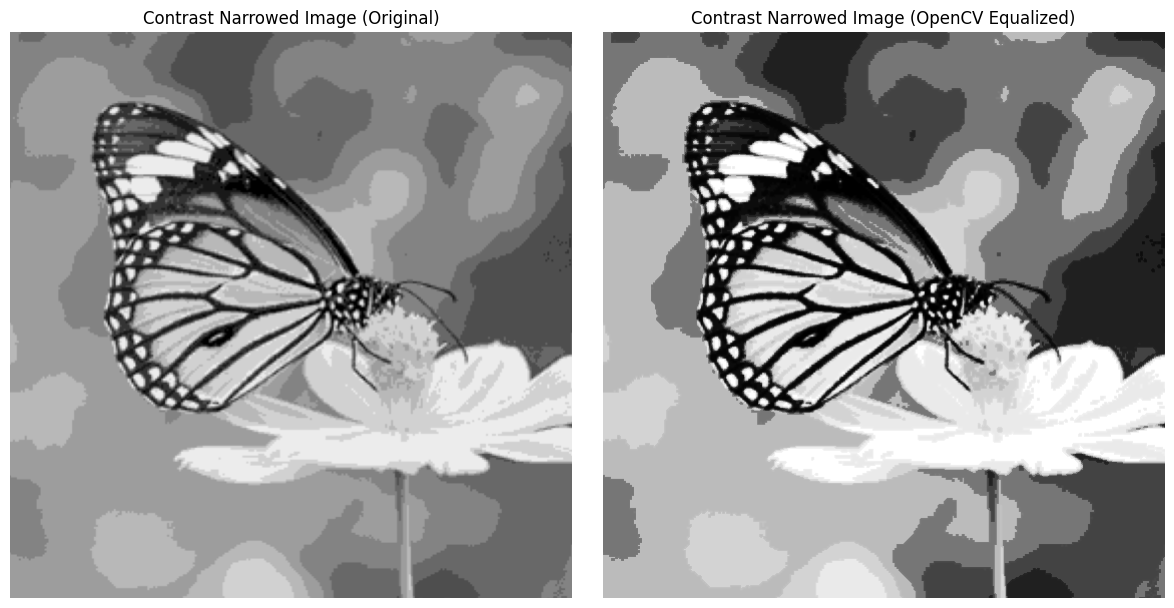

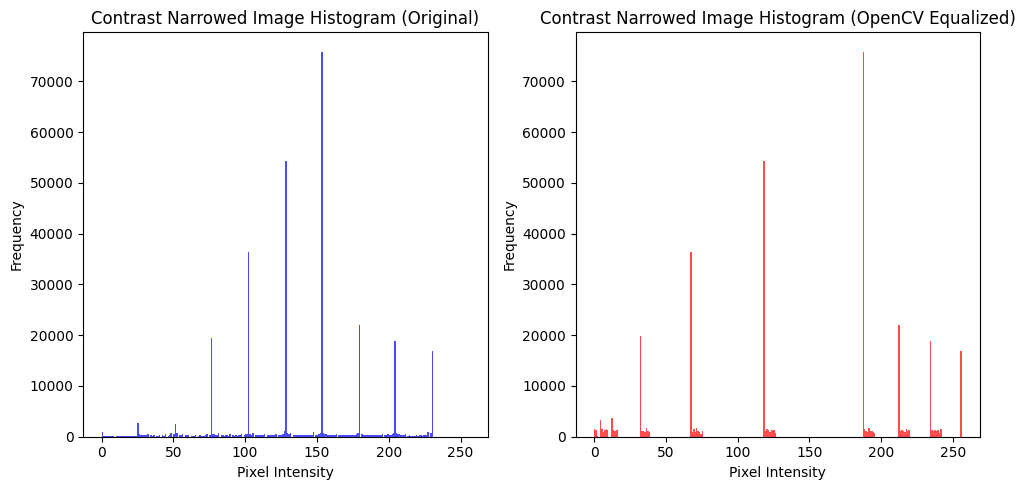

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

bright_image_path = "bright_image.png"
dark_image_path = "dark_image.png"
contrast_narrowed_image_path = "contrast_narrowed_image.png"

bright_image = cv2.imread(bright_image_path, cv2.IMREAD_GRAYSCALE)
if bright_image is None:
    raise FileNotFoundError(f"Bright image could not be loaded. Check the file path: {bright_image_path}")

dark_image = cv2.imread(dark_image_path, cv2.IMREAD_GRAYSCALE)
if dark_image is None:
    raise FileNotFoundError(f"Dark image could not be loaded. Check the file path: {dark_image_path}")

contrast_narrowed_image = cv2.imread(contrast_narrowed_image_path, cv2.IMREAD_GRAYSCALE)
if contrast_narrowed_image is None:
    raise FileNotFoundError(f"Contrast narrowed image could not be loaded. Check the file path: {contrast_narrowed_image_path}")

def lesson_histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    cdf = hist.cumsum() 
    cdf_normalized = cdf * (255 / cdf[-1])  
    
    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    return equalized_image.reshape(image.shape).astype(np.uint8)

def opencv_histogram_equalization(image):
    return cv2.equalizeHist(image)

def plot_images(original, modified, title_original="Original Image", title_modified="Modified Image"):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(title_original)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(modified, cmap='gray')
    plt.title(title_modified)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def plot_histograms(original, modified, title_original="Original Histogram", title_modified="Modified Histogram"):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(original.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    plt.title(title_original)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.subplot(1, 2, 2)
    plt.hist(modified.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
    plt.title(title_modified)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

images = {
    "Bright Image": bright_image,
    "Dark Image": dark_image,
    "Contrast Narrowed Image": contrast_narrowed_image
}

for title, image in images.items():
    print(f"\n{title} - Manual Histogram Equalization:")
    lesson_equalized = lesson_histogram_equalization(image)
    plot_images(image, lesson_equalized, title_original=f"{title} (Original)", title_modified=f"{title} (Manually Equalized)")
    plot_histograms(image, lesson_equalized, title_original=f"{title} Histogram (Original)", title_modified=f"{title} Histogram (Manually Equalized)")

    print(f"\n{title} - OpenCV Histogram Equalization:")
    opencv_equalized = opencv_histogram_equalization(image)
    plot_images(image, opencv_equalized, title_original=f"{title} (Original)", title_modified=f"{title} (OpenCV Equalized)")
    plot_histograms(image, opencv_equalized, title_original=f"{title} Histogram (Original)", title_modified=f"{title} Histogram (OpenCV Equalized)")
